In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_bias(qobj,cn=1,normcorr=False,plot_real=False,fac=1.,frac=False,r2=0.23/0.51,r4=0.15/0.52):
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    #l, ml = (np.loadtxt(qobj.f['TT'].MFcl,usecols=(0,cn))).T
    l, cl, xl, kk = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn,3,4))).T
    ol = (np.loadtxt(qobj.f['TT'].cl[0])).T[cn]
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[cn]
    if normcorr:
        xl = xl/r2
        cl = cl/r4
        n0 = n0/r4
        CL = cl-n0
        #CL = (cl-n0)*(kk/xl)**2*fac
        OL = (ol-rd)/r4
    else:
        CL = cl-n0
        OL = ol-rd
    if frac:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=.1,ymax=2.,ylab=r'Ratio of $C_L^{\kappa\kappa}$')
        plot(l,CL/kk,label='cl',color='r')
        plot(l,xl/kk,label='xl',color='g')
        axhline(1,color='k',ls='--')
        legend()
    else:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-5,ylog=True,ylab='$C_L^{\kappa\kappa}$')
        if cn==1 and plot_real: 
            plot(l,OL,label='ol',color='c')
        else:
            plot(l,al,label='norm',color='m')
            plot(l,n0,label='N0',color='y')
            plot(l,cl/99.,label='MF-MC',color='b',ls='--')
            plot(l,CL,label='cl',color='r')
            if cn==2: plot(l,OL,label='ol',color='c')
            plot(l,xl,label='xl',color='g')
            plot(l,kk,label='input',color='k')
            legend()
    return CL

In [3]:
#qid = 'boss_s15dn'
#qid = 'boss_s16d'
#qid = 'boss_alld'
qid = 'boss_alldn'

In [19]:
dirs = local.data_directory()
rlmax = 2500
rlmin = 500
aobj0 = local.init_analysis_params(qid=qid,fltr='cinv')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=rlmin,rlmax=rlmax,qlist=['TT'])
Qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=rlmin,rlmax=rlmax,qlist=['TT'],bhe=['src'])
aobj1 = local.init_analysis_params(qid=qid,fltr='none',wind='base',ivar='noivar')
qobj1 = quad_func.reconstruction(dirs['local'],aobj1.ids,stag=aobj1.stag,rlmin=rlmin,qlist=['TT'])
Qobj1 = quad_func.reconstruction(dirs['local'],aobj1.ids,stag=aobj1.stag,rlmin=rlmin,qlist=['TT'],bhe=['src'])

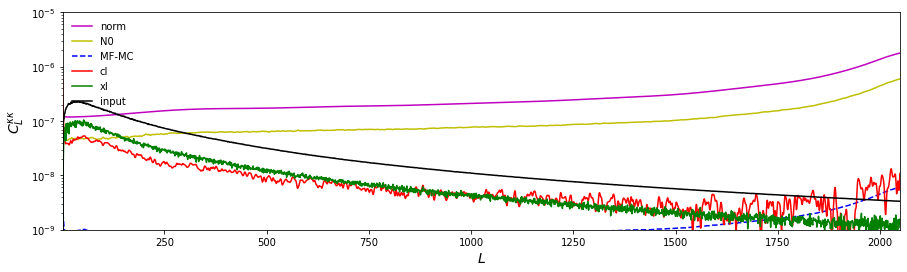

In [5]:
cl = plot_bias(qobj0)

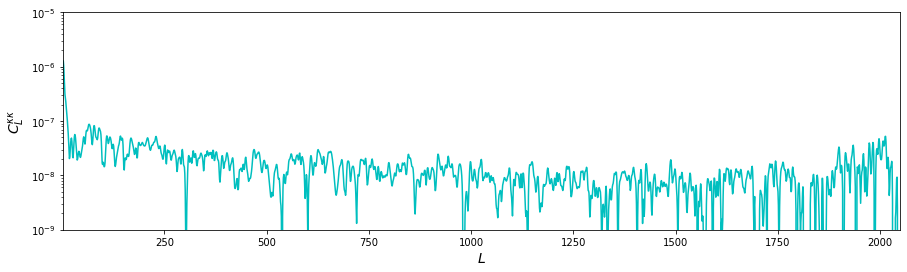

In [6]:
cl = plot_bias(qobj0,plot_real=True)

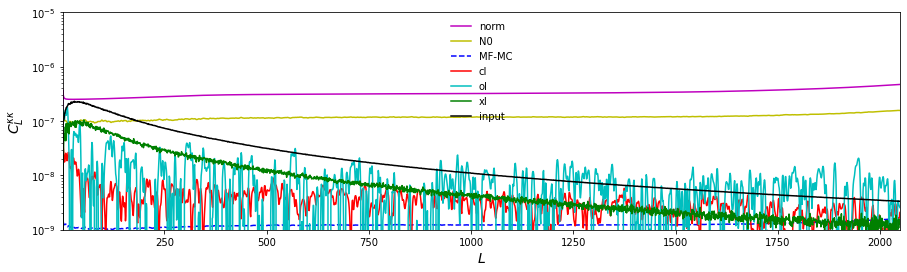

In [7]:
cl = plot_bias(qobj0,cn=2)

In [8]:
cl1 = plot_bias(qobj1)

OSError: /global/homes/t/toshiyan/Work/Ongoing/act_lens/data_local/lens/aps/Al_TT_boss_alldn_base_noivar_PT_a1.0deg_none_lc100_l1000-3000.dat not found.

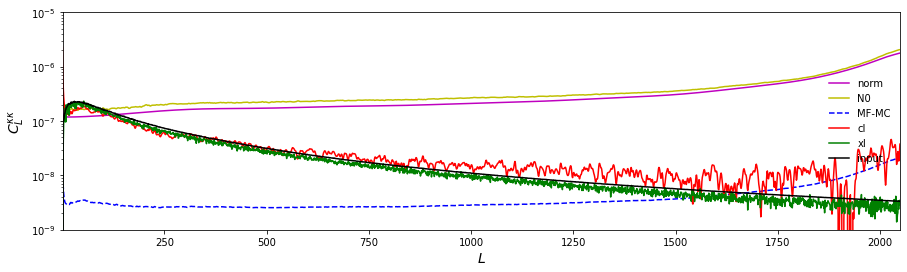

In [9]:
cl0 = plot_bias(qobj0,normcorr=True)

In [ ]:
cl1 = plot_bias(qobj1,frac=True,normcorr=True,r2=1.,r4=1.)

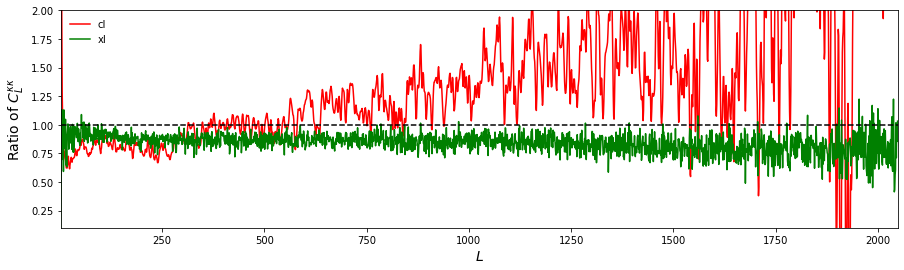

In [10]:
cl0 = plot_bias(qobj0,frac=True,normcorr=True)

NameError: name 'cl1' is not defined

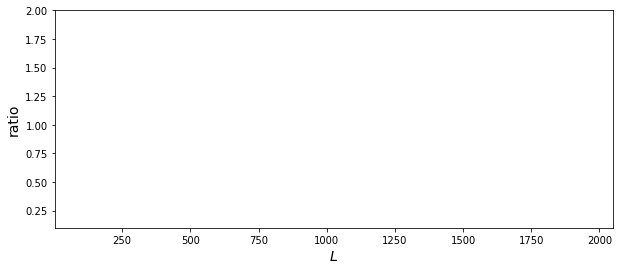

In [11]:
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=.1,ymax=2.,ylab='ratio')
plot(cl0/cl1)
axhline(1,color='k',ls='--')

### Real data

11.929536954519081
obs A 1.0 mean(A) 1.0 sigma(A) 0.114 S/N 8.769 A>oA 0.8200000000000001


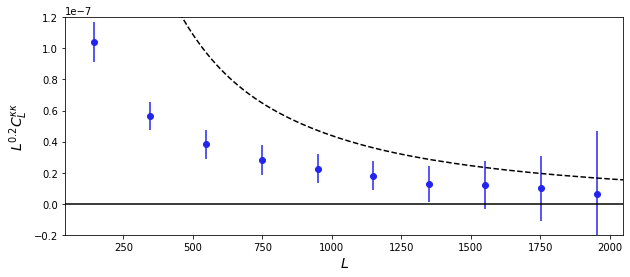

11.929536954519081
obs A 1.0 mean(A) 1.0 sigma(A) 0.114 S/N 8.769 A>oA 0.8200000000000001


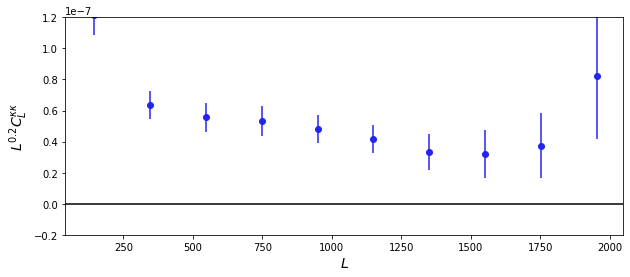

10.981082144011024
obs A 1.0 mean(A) 1.0 sigma(A) 0.127 S/N 7.849 A>oA 0.94


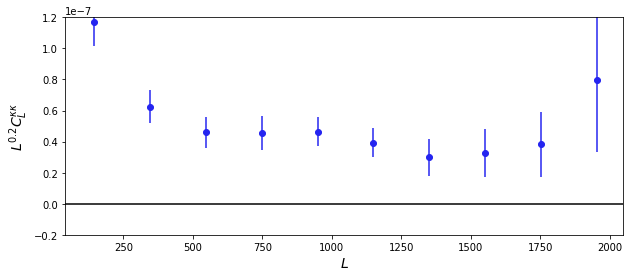

In [20]:
local.plot_spec_kk(qobj0,yrange=True,lfac=0.2)
local.plot_spec_kk(qobj0,plot_real=True,yrange=True,lfac=0.2)
local.plot_spec_kk(Qobj0,plot_real=True,yrange=True,lfac=0.2)

In [18]:
local.plot_spec_kk(qobj1,yrange=True)
local.plot_spec_kk(qobj1,plot_real=True,yrange=True)
local.plot_spec_kk(Qobj1,plot_real=True,yrange=True)

OSError: /global/homes/t/toshiyan/Work/Ongoing/act_lens/data_local/lens/aps/Al_TT_boss_alldn_base_noivar_PT_a1.0deg_none_lc100_l1000-3000.dat not found.